# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [5]:
#carregar as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


In [6]:
# Carregar a base de dados
df = pd.read_csv('/content/base_preparada.csv')

# Verificar as primeiras linhas
print(df.head())

# Verificar informações da base
print('\n\n\n', df.info())

# Verificar se há valores missing
print('\n\n\n', df.isnull().sum())

   qtd_filhos      idade  tempo_emprego  possui_celular  \
0           0  58.832877       3.106849               1   
1           0  52.356164       8.358904               1   
2           0  52.356164       8.358904               1   
3           0  46.224658       2.106849               1   
4           0  29.230137       3.021918               1   

   possui_fone_comercial  possui_fone  possui_email  qt_pessoas_residencia  \
0                      0            0             0                    2.0   
1                      0            1             1                    1.0   
2                      0            1             1                    1.0   
3                      1            1             1                    2.0   
4                      0            0             0                    2.0   

     mau  sexo_M  ...  educacao_Secondary / secondary special  \
0  False    True  ...                                    True   
1  False   False  ...                         

Conclusão: A base não possui variáveis do tipo object (strings) e nem valores missing (NaN).

In [7]:
# Separar a variável resposta (y) e as variáveis explicativas (X)
X = df.drop(columns=['mau'])  # Todas as colunas exceto 'mau'
y = df['mau']  # Apenas a coluna 'mau'

# Verificar shapes
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

Shape de X: (16650, 28)
Shape de y: (16650,)


In [8]:
# Dividir a base em treino e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Verificar shapes
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Shape de X_train: (11655, 28)
Shape de X_test: (4995, 28)
Shape de y_train: (11655,)
Shape de y_test: (4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

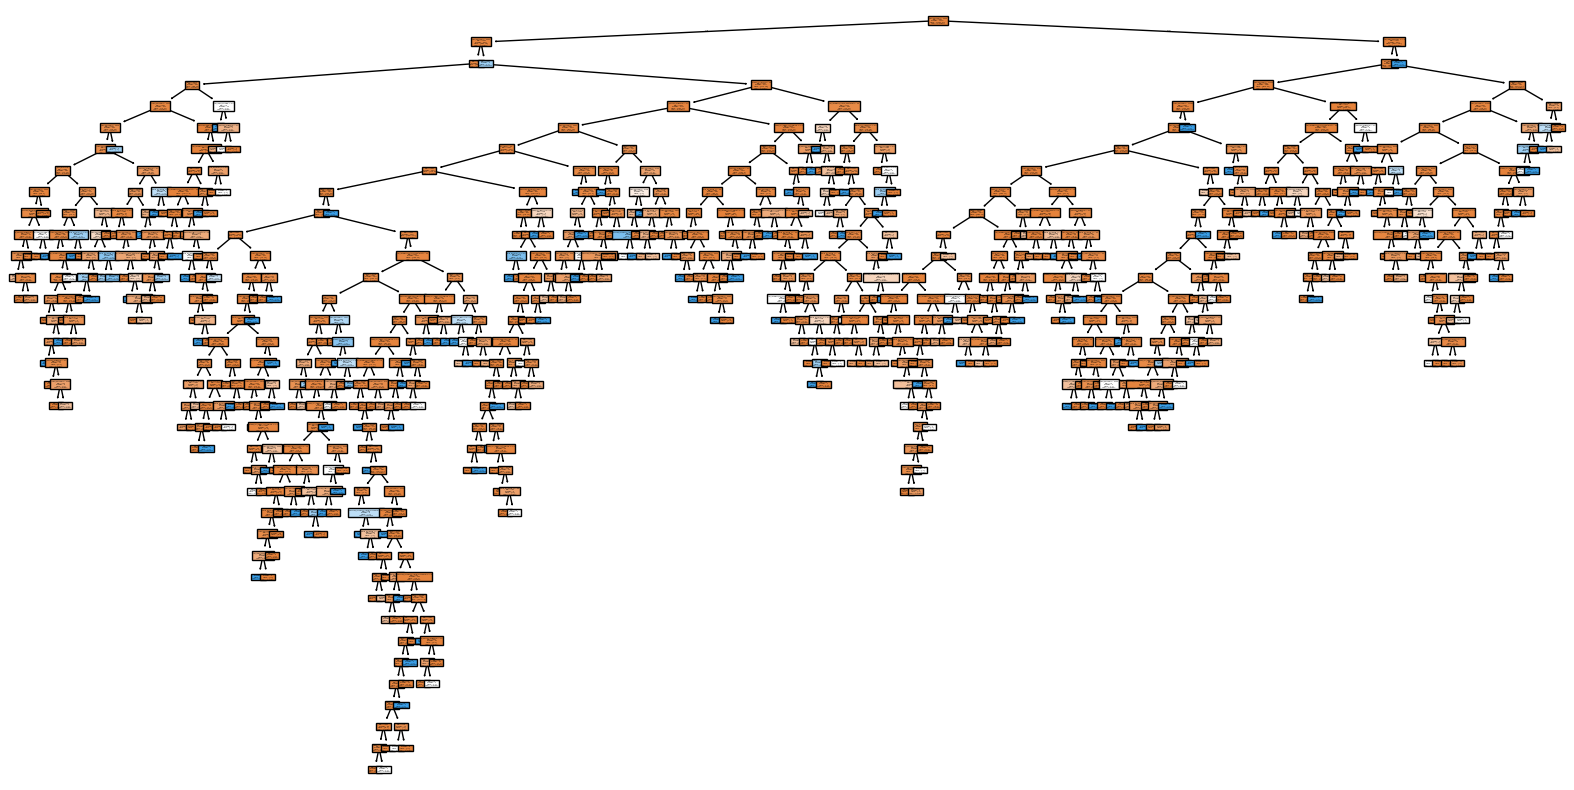

In [9]:
# Definir o modelo de árvore de decisão
modelo = DecisionTreeClassifier(random_state=123)

# Treinar o modelo
modelo.fit(X_train, y_train)

# Configurar o tamanho da figura
plt.figure(figsize=(20, 10))

# Plotar a árvore de decisão
plot_tree(modelo, filled=True, feature_names=X.columns, class_names=["Aprovados", "Reprovados"])

# Exibir a figura
plt.show()

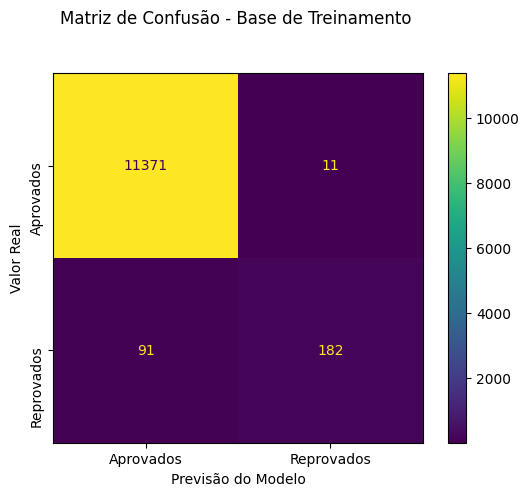



Acurácia na base de treinamento: 0.99


In [10]:
# Fazer previsões na base de treinamento
y_pred_train = modelo.predict(X_train)

# Criar a matriz de confusão
cm = confusion_matrix(y_train, y_pred_train)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Aprovados", "Reprovados"])
disp.plot()
plt.title("Matriz de Confusão - Base de Treinamento \n\n")
disp.ax_.set_xlabel("Previsão do Modelo")
disp.ax_.set_ylabel("Valor Real")
disp.ax_.set_yticklabels(disp.ax_.get_yticklabels(), rotation=90)
plt.show()

# Calcular a acurácia
acuracia = accuracy_score(y_train, y_pred_train)

# Exibir a acurácia
print(f"\n\nAcurácia na base de treinamento: {acuracia:.2f}")

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

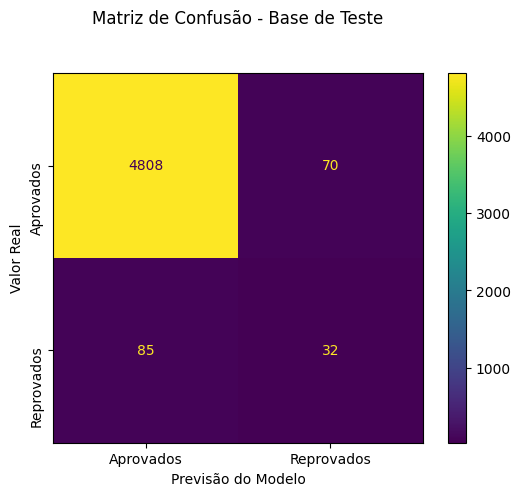



Acurácia na base de treinamento: 0.99
Acurácia na base de teste: 0.97


In [11]:
# Fazer previsões na base de teste
y_pred_test = modelo.predict(X_test)

# Criar a matriz de confusão para a base de teste
cm_test = confusion_matrix(y_test, y_pred_test)

# Plotar a matriz de confusão
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Aprovados", "Reprovados"])
disp_test.plot()
disp_test.ax_.set_title("Matriz de Confusão - Base de Teste\n\n")
disp_test.ax_.set_xlabel("Previsão do Modelo")
disp_test.ax_.set_ylabel("Valor Real")
disp_test.ax_.set_yticklabels(disp_test.ax_.get_yticklabels(), rotation=90)

# Exibir a matriz de confusão
plt.show()

# Calcular a acurácia na base de teste
acuracia_test = accuracy_score(y_test, y_pred_test)

# Exibir as acurácias
print(f"\n\nAcurácia na base de treinamento: {acuracia:.2f}")
print(f"Acurácia na base de teste: {acuracia_test:.2f}")

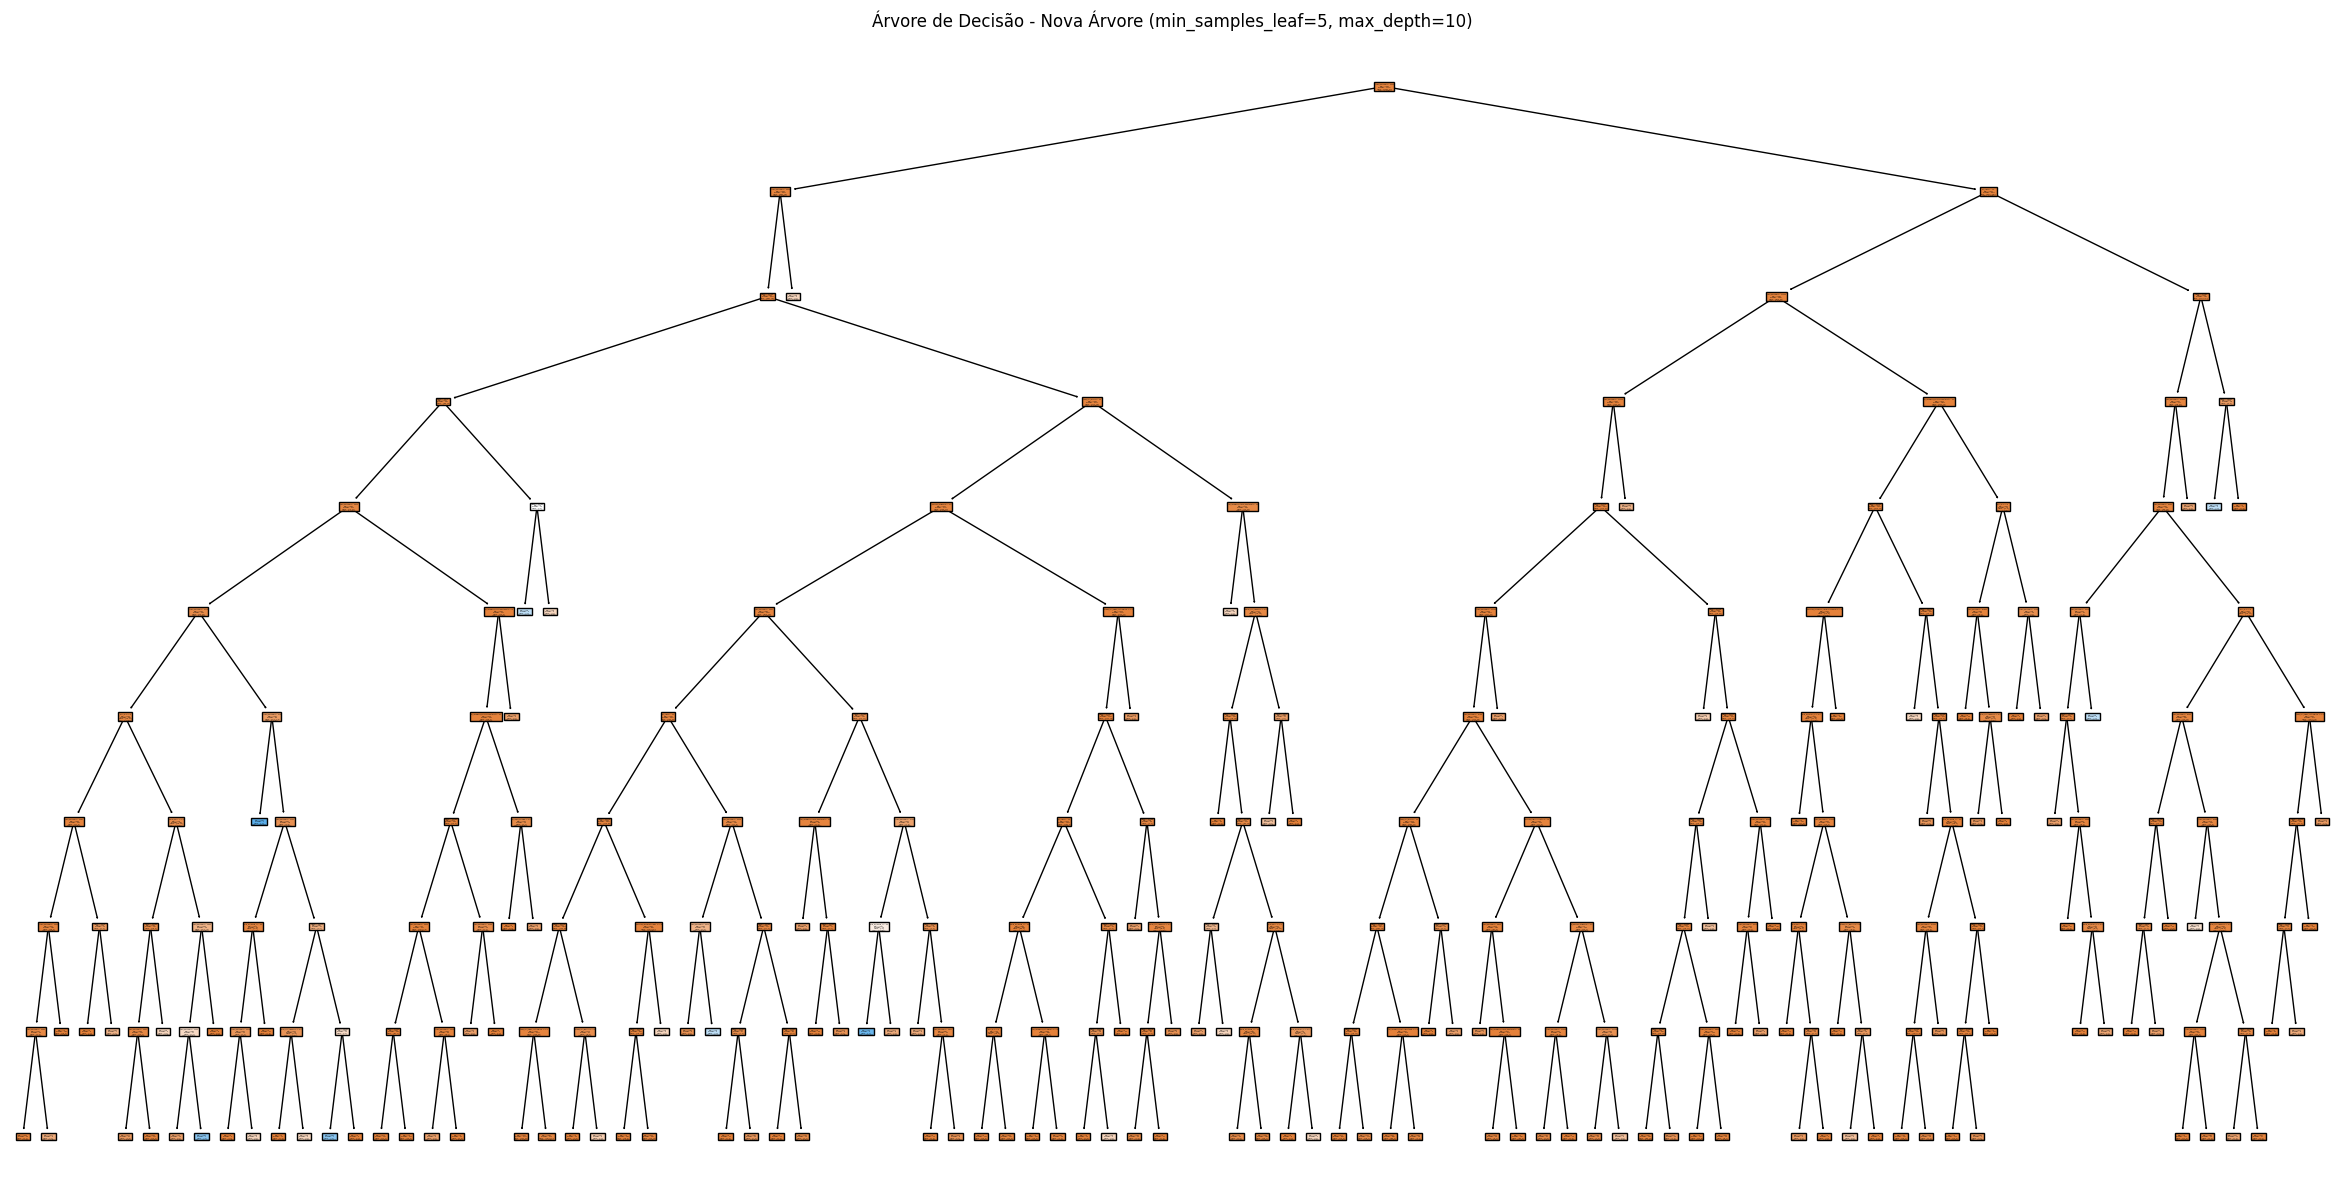

In [18]:
# Definir o novo modelo de árvore de decisão
modelo_novo = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

# Treinar o novo modelo
modelo_novo.fit(X_train, y_train)

# Fazer previsões na base de teste com o novo modelo
y_pred_test_novo = modelo_novo.predict(X_test)

# Definir o tamanho da figura para melhor visualização
plt.figure(figsize=(30, 15))

# Plotar a árvore de decisão
plot_tree(modelo_novo, filled=True, feature_names=X.columns, class_names=["Aprovados", "Reprovados"])

# Adicionar título
plt.title("Árvore de Decisão - Nova Árvore (min_samples_leaf=5, max_depth=10)")

# Exibir a árvore
plt.show()

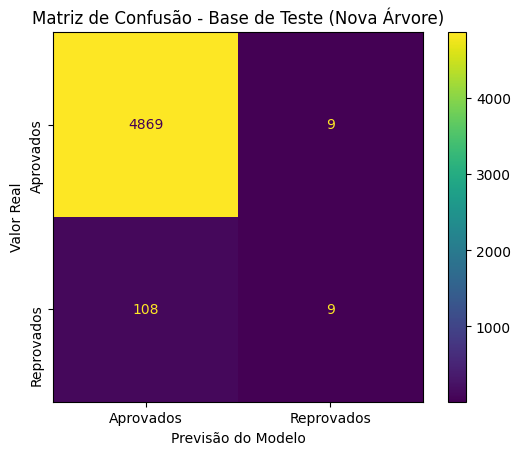



Proporção de proponentes classificados como 'maus': 0.00


In [19]:
# Criar a matriz de confusão para o novo modelo
cm_test_novo = confusion_matrix(y_test, y_pred_test_novo)

# Plotar a matriz de confusão
disp_test_novo = ConfusionMatrixDisplay(confusion_matrix=cm_test_novo, display_labels=["Aprovados", "Reprovados"])
disp_test_novo.plot()
disp_test_novo.ax_.set_title("Matriz de Confusão - Base de Teste (Nova Árvore)")
disp_test_novo.ax_.set_xlabel("Previsão do Modelo")
disp_test_novo.ax_.set_ylabel("Valor Real")
disp_test_novo.ax_.set_yticklabels(disp_test_novo.ax_.get_yticklabels(), rotation=90)

# Exibir a matriz de confusão
plt.show()

# Calcular a proporção de proponentes classificados como 'maus'
proporcao_maus = y_pred_test_novo.mean()
print(f"\n\nProporção de proponentes classificados como 'maus': {proporcao_maus:.2f}")

In [20]:
# Criar um vetor de previsões onde todos são 'bons'
y_pred_todos_bons = [False] * len(y_test)

# Calcular a acurácia
acuracia_todos_bons = accuracy_score(y_test, y_pred_todos_bons)

# Exibir a acurácia
print(f"Acurácia se todos os contratos fossem classificados como 'bons': {acuracia_todos_bons:.2f}")

Acurácia se todos os contratos fossem classificados como 'bons': 0.98
